In [1]:

from PollenDataAnalyzer import PollenDataAnalyzer
%pip install tqdm
from collections import defaultdict


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:

# %pip install matplotlib
# from PollenDataAnalyzer import PollenDataAnalyzer

# TODOS !!!!
# should we change the itensity_mapping, it seem kind of werid that it's all low and high
# 


In [3]:
#!!!download and Change the data_path for your own "dataset-for-roi/cleaned_status_intensity_observation_data.csv" path on your local computer
#also download and change the land_cover_path
#these path are for KATHY!!
analyzer = PollenDataAnalyzer(
    data_path="/Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi-2/status_intensity_observation_data.csv",  # or the raw CSV
    mapping_path="../intensity_mapping.json",
    Phenophase_path="../Phenophase.json", 
    land_cover_path ="/Applications/Home/2025 Spring/GEOG398E/Project data/table_2021_counties_max.xlsx - table_2021_counties_max.csv"

)

In [4]:
#first 2 column
analyzer.df.head(2)

,Observation_ID,ObservedBy_Person_ID,Latitude,Longitude,State,Species_ID,Individual_ID,Plant_Nickname,Phenophase_ID,Phenophase_Category,...,Day_of_Year,Intensity_Category_ID,Intensity_Value,Site_Visit_ID,AGDD,Tmax,Tmin,Prcp,Accum_Prcp,Daylength
766,3453961,2749,35.64893,-78.816948,NC,82,6552,tuliptree-1,371,Leaves,...,96,39,high,61281,599.75,19.0,8.0,0.0,315.0,45274
767,3476283,2749,35.64893,-78.816948,NC,82,6552,tuliptree-1,371,Leaves,...,101,39,high,61777,667.00,24.5,7.0,0.0,336.0,45965


In [5]:
#checking to see all the unique Phenophases
#we would only want the "Reproductive phenophases" that is in Phenophase.json
analyzer.df["Phenophase_Description"].unique()

array(['Breaking leaf buds', 'Ripe fruits', 'Increasing leaf size',
       'Leaves', 'Colored leaves', 'Flowers or flower buds',
       'Open flowers', 'Recent fruit or seed drop', 'Fruits',
       'Pollen release (flowers)', 'Unripe seed cones', 'Ripe seed cones',
       'Breaking needle buds (conifers)', 'Young needles (conifers)',
       'Pollen cones (conifers)', 'Recent cone or seed drop',
       'Open pollen cones (conifers)', 'Pollen release (conifers)',
       'Emerging needles (pines)', 'Flower heads (grasses/sedges)',
       'Open flowers (grasses/sedges)', 'Young needles (pines)',
       'Young leaves (tree/shrub)', 'Leaves (grasses)', 'Leaves (sedges)',
       'Breaking needle buds (deciduous)', 'Needles (deciduous)',
       'Colored needles', 'Leaves (rushes)'], dtype=object)

In [6]:
#with all the correct mapping of the Phenophases
#make self.df pollen only and store it in pollen_df
analyzer.pollen_only()

Pollen-only dataset created with 32196 rows.
Original dataset has 239913 rows.


In [7]:
#using the pollen_df to convert only the correct phenophase data with corresponding lag_long to county ideas
#https://geo.fcc.gov/api/census/#!/area/get_area
#this will take 1-3 minutues max
# and also store a copy to Kathy's personal path (LINE 169 to delete it or change it to your own path)
analyzer.lat_long_to_county()

Fetching county FIPS codes...


Fetching FIPS: 100%|████████████████████████████████████████| 32196/32196 [00:17<00:00, 1861.60it/s]


Finished fetching county FIPS codes.
         Observation_ID  ObservedBy_Person_ID   Latitude  Longitude State  \
1266            7674014                  2749  35.648930 -78.816948    NC   
1279            9894514                  2749  35.648930 -78.816948    NC   
1280            9959272                  2749  35.648930 -78.816948    NC   
1281           10053832                  2749  35.648930 -78.816948    NC   
1282           10705250                  2749  35.648930 -78.816948    NC   
...                 ...                   ...        ...        ...   ...   
1670447        52064280                 77249  39.033443 -77.018204    MD   
1671483        51959969                 74062  35.167660 -81.056870    NC   
1671520        52067610                 45694  39.009678 -77.095146    MD   
1671614        52137296                 61752  38.883358 -77.106964    VA   
1671615        52137297                 61752  38.883358 -77.106964    VA   

         Species_ID  Individual_ID    

In [8]:
analyzer.add_land_cover_info("/Applications/Home/2025 Spring/GEOG398E/Project data/table_2021_counties_max.xlsx - table_2021_counties_max.csv")

Land cover types added using hash table.
     county_fips        land_cover_type
1266       37183  Developed, open space
1279       37183  Developed, open space
1280       37183  Developed, open space
1281       37183  Developed, open space
1282       37183  Developed, open space


In [9]:
##give me the unique year for the column "Observation_Date", the date is format it as year-month-date (0000-00-00)
## just return me a list where how many unique year row are there 
year_counts = defaultdict(int)

# Loop through each date and extract the year
for date in analyzer.final_df["Observation_Date"]:
    year = str(date)[:4]  # Get the year part from YYYY-MM-DD
    year_counts[year] += 1

# Sort by year
sorted_years = sorted(year_counts.items())

# Print as a clean table
print(f"{'Year':<10} {'Count':<10}")
print("-" * 20)
for year, count in sorted_years:
    print(f"{year:<10} {count:<10}")

#check if it match with Pollen-only dataset created with 31935 rows. it does!
print("final data sets", len(analyzer.final_df), "rows.") 


Year       Count     
--------------------
2011       1         
2012       41        
2013       851       
2014       958       
2015       782       
2016       1717      
2017       2270      
2018       2287      
2019       2211      
2020       1701      
2021       3256      
2022       5019      
2023       5738      
2024       3659      
2025       1705      
final data sets 32196 rows.


In [17]:
print(analyzer.final_df.columns)


# Make a copy of the column names
columns_to_getrid = analyzer.final_df.columns.difference(
    ['ObservedBy_Person_ID', 'Latitude', 'Longitude', 'Individual_ID', 
     'Phenophase_Category', 'Phenophase_Name', 'Site_Visit_ID']
)

# Reorder columns to make 'Observation_ID' the first column
columns_reordered = ['Observation_ID'] + [col for col in columns_to_getrid if col != 'Observation_ID']

# Create a new DataFrame with the reordered columns
cleaned_df = analyzer.final_df[columns_reordered]

# Save the new DataFrame to the specified path
cleaned_df.to_csv(
    "/Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi/cleaned_V1.0_status_intensity_observation_data.csv",
    index=False
)


Index(['Observation_ID', 'ObservedBy_Person_ID', 'Latitude', 'Longitude',
       'State', 'Species_ID', 'Individual_ID', 'Plant_Nickname',
       'Phenophase_ID', 'Phenophase_Category', 'Phenophase_Description',
       'Phenophase_Name', 'Phenophase_Definition_ID', 'Observation_Date',
       'Day_of_Year', 'Intensity_Category_ID', 'Intensity_Value',
       'Site_Visit_ID', 'AGDD', 'Tmax', 'Tmin', 'Prcp', 'Accum_Prcp',
       'Daylength', 'county_fips', 'land_cover_type'],
      dtype='object')


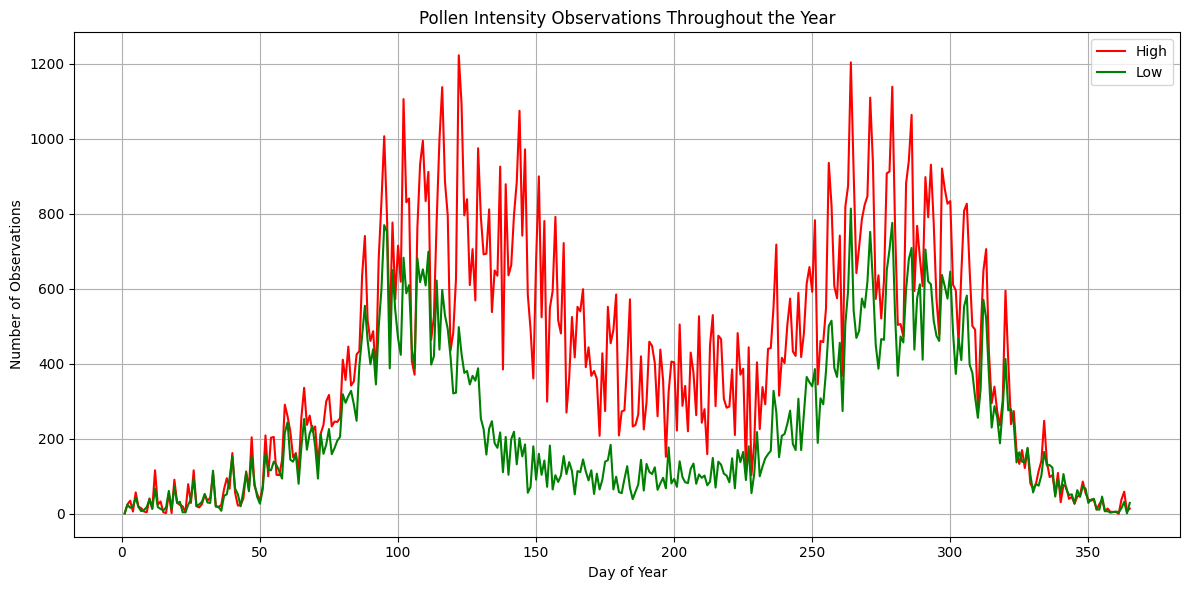

In [10]:
analyzer.plot_intensity_counts()

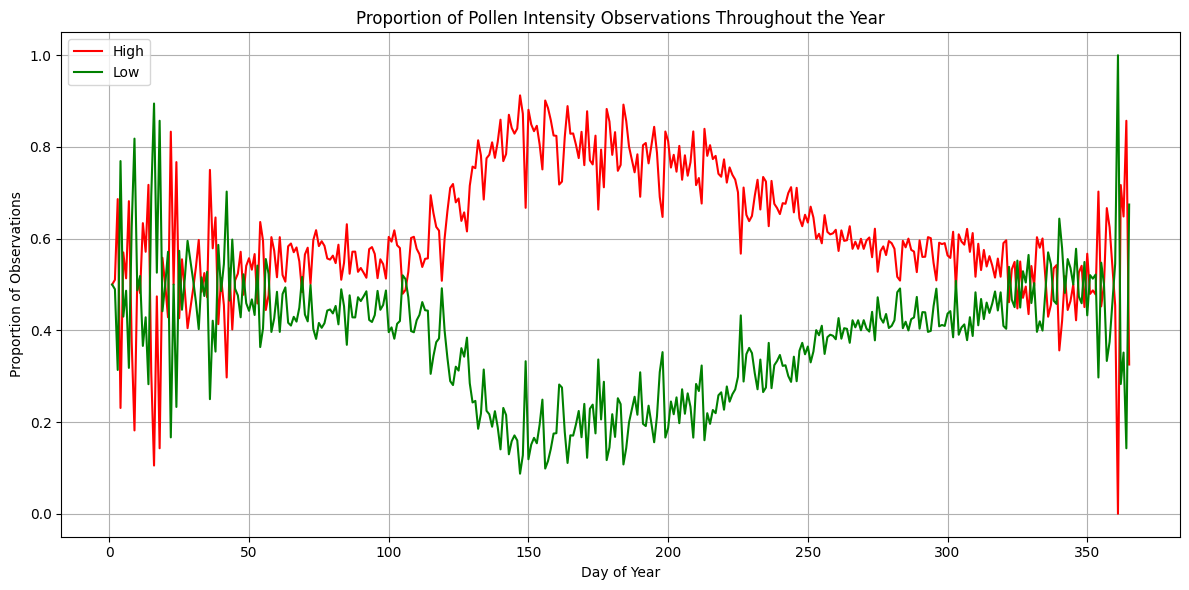

In [11]:
analyzer.plot_normalized_intensity()

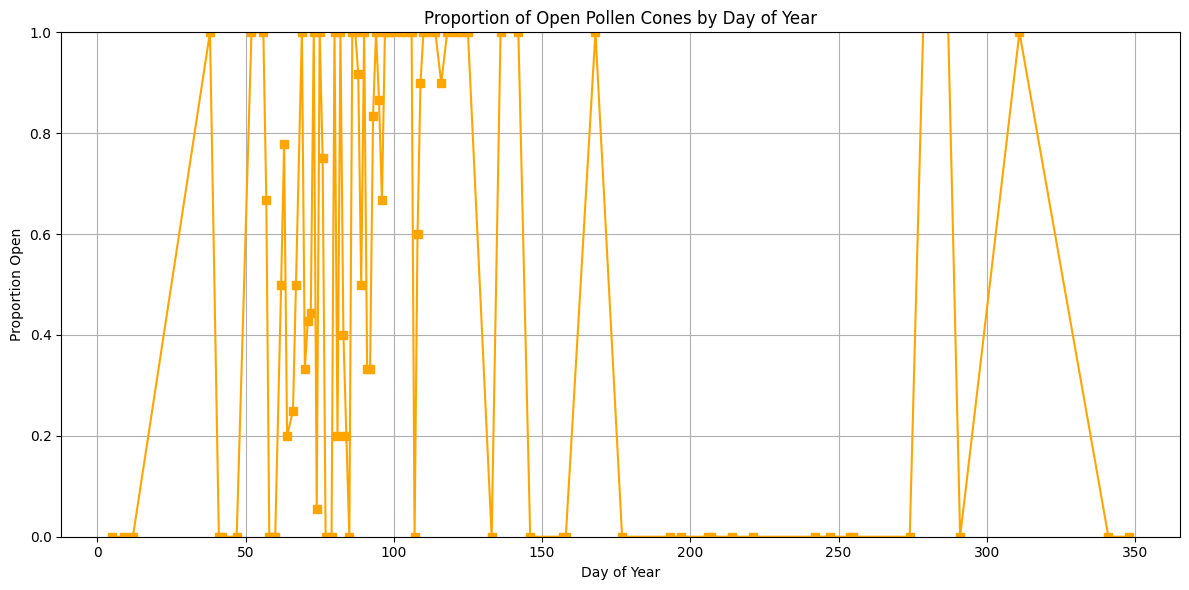

In [12]:
analyzer.plot_open_pollen_cones()